C:\Users\marti\AppData\Local\Temp\ipykernel_38924\1195255334.py:13: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  log = pd.read_csv("exportedLog.csv", delimiter=';')


Lap 1 0:01:43.900000
Lap 2 0:01:38.500000
Lap 3 0:01:37.600000
Lap 4 0:01:37.600000
Your fastest lap was 0:01:37.600000


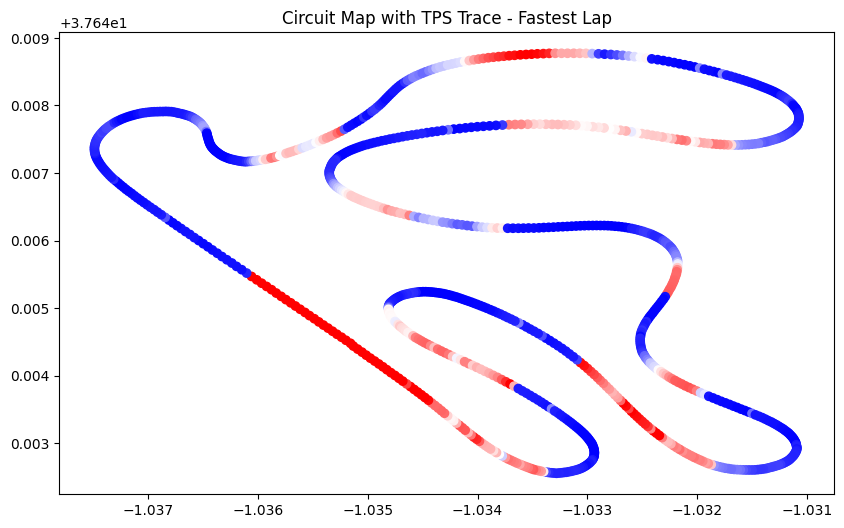

In [30]:
import json
import pandas as pd
import numpy as np
from haversine import haversine, Unit
import datetime
import matplotlib.pyplot as plt

#User Defined Variables
circuitName = "cartagena"
finishLineMeters = 5

#Read Log file
log = pd.read_csv("exportedLog.csv", delimiter=';')

#Import Circuits
with open("../circuits.json") as f:
    circuits = json.load(f)

finishLineLat = circuits.get(circuitName).get('FinishLine').get('latitude')
finishLineLong = circuits.get(circuitName).get('FinishLine').get('longitude')

#Remove i2m metaData Unwanted Lines
log.drop(log.index[0], inplace=True)
log.drop(log.index[0], inplace=True)
log.drop(log.index[0], inplace=True)
del log[log.columns[0]]

log = log.apply(pd.to_numeric)

time = log['Time [s]']
lat = log['LAT [Degrees]']
long = log['LONG [Degrees]']

def isNearFinishLine(currentLat, currentLong):
    finishline = (finishLineLat, finishLineLong)
    currentLocation = (currentLat, currentLong)
    if haversine(finishline, currentLocation, unit='m') < finishLineMeters:
        return True
    return False

#Detecting each new lap, comparing lap times & logging the fastest lap with it's start and end locations
previousLapTime = 0
previousLapLocation = 0
fastestLapStart = 0
fastestLapEnd = 0
lapsCompleted = 0
fastestLap = 0
for x in range(0, len(time)):
    if ~np.isnan(lat.iloc[x]) and ~np.isnan(lat.iloc[x]) and isNearFinishLine(lat.iloc[x], long.iloc[x]):
        lapTime = time.iloc[x] - previousLapTime
        previousLapTime = time.iloc[x]
        lapsCompleted = lapsCompleted + 1
        if fastestLap == 0:
            fastestLap = lapTime
            fastestLapEnd = x
        elif lapTime < fastestLap:
            fastestLap = lapTime
            fastestLapStart = previousLapLocation
            fastestLapEnd = x
        previousLapLocation = x
        print("Lap", lapsCompleted, str(datetime.timedelta(seconds=lapTime)))

print("Your fastest lap was", str(datetime.timedelta(seconds=fastestLap)))

#Removing everything but the fastest Lap
indexesBeforeFastest = []
indexesAfterFastest = []

for x in range(0, fastestLapStart):
    indexesBeforeFastest.append(x+3)  #Need the +3 because 3 indexes are removed at the start

for x in range(fastestLapEnd, len(log)):
    indexesAfterFastest.append(x)

log.drop(indexesAfterFastest, inplace=True)
log.drop(indexesBeforeFastest, inplace=True)

#Remove lines with NaN's
log = log.dropna(subset=['LAT [Degrees]'])
log = log.dropna(subset=['LONG [Degrees]'])

latGPS = log['LAT [Degrees]']
longGPS = log['LONG [Degrees]']
tps = log['TPS']

fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(longGPS, latGPS, c=tps)
plt.set_cmap('bwr')
plt.title('Circuit Map with TPS Trace - Fastest Lap')
plt.show()